# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br>
Url: https://github.com/obed-ortiz/VIU_algoritmos_de_optimizacion/tree/main/SEMINARIO<br>
Problema:
<b> Sesiones de doblaje </b>

Descripción del problema:
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:<br>

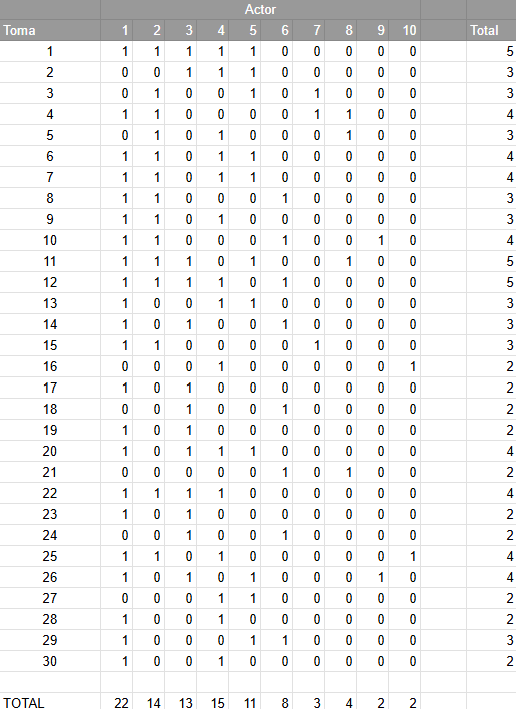

<b>Número de actores:</b> 10<br>
<b>Número de tomas:</b> 30<br>

- 1 indica que el actor participa en la toma<br>
- 0 en caso contrario



In [30]:
import random
from tabulate import tabulate
from copy import deepcopy

<b>Restricciones</b><br>
30 tomas deben asignarse a días<br>
Máximo 6 tomas por día<br>
Cada toma se asigna exactamente una vez<br>

In [1]:
max_tomas_por_dia = 6

### ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

Para encontrar todas las combinaciones posibles para el ejercicio utilizaremos los números de Bell ($B_n$).

Los números de Bell nos dicen cuántas maneras diferentes hay de agrupar los elementos de un conjunto. Imagina que tienes varios objetos: el número de Bell te dice todas las formas posibles en que puedes juntar esos objetos en grupos, donde cada grupo debe tener al menos un objeto y el orden de los grupos no importa.
> Ejemplo
>
> $ B_3 = 5 $ porque el conjunto de tres elementos $\{a, b, c\}$ se puede dividir de 5 formas distintas.
>
>$\{\{a\}, \{b\}, \{c\}\}$
>
>$\{\{a\}, \{b,c\}\}$
>
>$\{\{b\}, \{a,c\}\}$
>
>$\{\{c\}, \{a,b\}\}$
>
>$\{\{a,b,c\}\}$

Los números de Bell cumplen la fórmula de Dobinski

$B_n=\frac{1}{e}\sum _{k=0} ^{\infty} \frac{k^n}{k!}$

------------------------------------------------------------------
Eplicación con numeros pequeños:

Primero hallaremos la sumatoria, por ejemplo:

Si deseamos aplicar la suma de k=0 hasta k=3

$\sum _{k=0} ^{3} \frac{k^n}{k!}$

Se tendría que realizar de la siguiente manera:

$\frac{0^{30}}{0!} + \frac{1^{30}}{1!} + \frac{2^{30}}{2!} + \frac{3^{30}}{3!} $

$\approx 0 + 1 + 536870912 + 34315188682441.5 = 34315725553354.5  $

------------------------------------------------------------------

Aplicando a nuestro problema:

$\sum _{k=0} ^{100} \frac{k^{30}}{k!} \approx 2.30×10^{24}$ 

Ahora aplicaremos $ \frac{1}{e}  donde, e \approx 2.71828 $

$B_{30} \approx \frac{2.30×10^{24}}{2.71828} \approx 8.46×10^{23}$ 

Aplicando fórmula de Dobinski en Python:

In [4]:
import math

def dobinski(n, terms=100):
    suma = 0
    for k in range(terms):
        suma += (k ** n) / math.factorial(k)
    return round(suma / math.e)
n=30
print(f"B_{n} =", dobinski(n))

B_30 = 846749014511809523089408


Conclusion

Las posibilidades sin tener en cuenta las restricciones son: 846749014511809523089408 

### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?

Para estimar el tiempo que tomará grabar las 30 tomas, sabiendo que no se repiten y que el límite diario es de 6 tomas, podemos establecer un rango:
- El mínimo de días sería de 5, asumiendo que se graban las 6 tomas diarias posibles 
<b>(30 tomas÷6 tomas/día=5 días).</b>
- El máximo de días ascendería a 30, en el caso de que solo se grabe una toma por día <b>(30 tomas÷1 toma/día=30 días).</b>


### ¿Cual es la estructura de datos que mejor se adapta al problema?
Para este ejercicio, se utilizó varias estructuras de datos. Las matrices binarias fueron clave para identificar fácilmente variables del problema, donde las filas representaban las tomas y las columnas, los actores. Un "1" indicaba la participación del actor en la toma, mientras que un "0" significaba lo contrario.

Además, se usó las listas para manejar combinaciones de datos de forma flexible. Finalmente, los conjuntos (sets) permitieron eliminar duplicados en esas combinaciones.


### ¿Cual es la función objetivo?
La función objetivo del problema es:<br>
Minimizar el costo total de los actores, donde el costo por día es:<br>
Costo por día = (Número de actores únicos en el día) X (Costo por actor por día)<br><br>
Detalles clave:<br>
- Cada actor cobra por día (no por toma), por lo que reutilizar actores en el mismo día reduce costos.
- La restricción de máximo 6 tomas/día limita cómo se agrupan las tomas.




### ¿Es un problema de maximización o minimización?

El problema es de minimización, ya que el objetivo es reducir al mínimo posible el costo por los servicios de los actores de doblaje.

Se busca que el costo total (número de días que los actores deben desplazarse al estudio) sea el menor posible. Cada actor cobra por día de trabajo, independientemente de cuántas tomas se graben ese día.

Para minimizar los costos, es crucial seleccionar cuidadosamente las tomas a realizar cada día. No es obligatorio grabar las 6 tomas diarias; esta flexibilidad nos ofrece más oportunidades para optimizar los gastos.

### Diseña un algoritmo para resolver el problema por fuerza bruta

#### FUERZA BRUTA

In [5]:
dataset_furza_bruta = [
    [1,	1,	1,	1,	1,	0,	0,	0,	0,	0], # Toma 1
    [0,	0,	1,	1,	1,	0,	0,	0,	0,	0], # Toma 2
    [0,	1,	0,	0,	1,	0,	1,	0,	0,	0], # Toma 3
    [1,	1,	0,	0,	0,	0,	1,	1,	0,	0], # Toma 4
    [0,	1,	0,	1,	0,	0,	0,	1,	0,	0], # Toma 5
    [1,	1,	0,	1,	1,	0,	0,	0,	0,	0], # Toma 6
    [1,	1,	0,	1,	1,	0,	0,	0,	0,	0], # Toma 7
    [1,	1,	0,	0,	0,	1,	0,	0,	0,	0], # Toma 8
    [1,	1,	0,	1,	0,	0,	0,	0,	0,	0], # Toma 9
    [1,	1,	0,	0,	0,	1,	0,	0,	1,	0], # Toma 10
    [1,	1,	1,	0,	1,	0,	0,	1,	0,	0], # Toma 11
    [1,	1,	1,	1,	0,	1,	0,	0,	0,	0], # Toma 12
]
num_tomas_furza_bruta = len(dataset_furza_bruta)
num_actores_furza_bruta = len(dataset_furza_bruta[0])
max_tomas_por_dia_furza_bruta = 3

<b>Búsqueda de combinaciones de tomas</b>

Se busca todas las combinaciones de “num_tomas” con la restricción de un número máximo de agrupaciones “max_tomas_por_dia”.<br>
Por ejemplo, si son 3 tomas con la restricción de 2 tomas máximo por día, se obtendrá las siguientes combinaciones:
```
[
    [[0], [1, 2]], 
    [[0, 2], [1]], 
    [[0, 1], [2]], 
    [[0], [1], [2]]
]
```

In [3]:
# hallar todas las combinaciones de tomas
def ordenar_resultados(grupos):
    grupos_ordenados = []
    for grupo in grupos:
        grupo_ordenado = tuple(sorted(grupo))
        grupos_ordenados.append(grupo_ordenado)

    # Ordenar los grupos por contenido
    grupos_ordenados.sort()
    return tuple(grupos_ordenados)

def particiones_max_tomas_por_dia(lista, max_tomas_por_dia):
    # Set para eliminar duplicados
    resultado = set()

    def generar_grupos(elementos, grupos_actuales):
        if not elementos:
            # Ordenar el resultado y convertir a tuplas para evitar duplicados
            normalizada = ordenar_resultados(grupos_actuales)
            resultado.add(normalizada)
            return
        
        elemento_evaluado = elementos[0]
        resto = elementos[1:]

        for i,sesion in enumerate(grupos_actuales):
            if len(sesion) < max_tomas_por_dia:
                sesion.append(elemento_evaluado)
                generar_grupos(resto, grupos_actuales)
                sesion.pop()

        # Crear nuevo grupo si es necesario
        grupos_actuales.append([elemento_evaluado])
        generar_grupos(resto, grupos_actuales)
        grupos_actuales.pop()

    generar_grupos(lista, [])
    # Cambiar formato tupla a matriz
    return [list(list(sesion) for sesion in particion) for particion in resultado]

combinaciones = particiones_max_tomas_por_dia(list(range(num_tomas_furza_bruta)), max_tomas_por_dia_furza_bruta)
print(f"Cantidad de combinaciones: {len(combinaciones)}")

NameError: name 'num_tomas_furza_bruta' is not defined

<b>Calcular el costo de las de grabación por día.</b>

Se necesita una función que, dada la cantidad de tomas realizadas en un día, identifique a todos los actores que participaron en ellas. Independientemente del número de tomas en las que aparezca un actor, su participación se considerará como un costo único, según lo especificado en el enunciado del ejercicio.
###### ”Los actores de doblaje cobran toda la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben”

In [4]:
def calcular_costo_tomas(tomas, dataset,num_actores):
    if not tomas:
        return 0
    
    # Obtener todos los actores que aparecen en las tomas de esta sesión
    actores_necesarios = [False] * num_actores

    for i in tomas:
        for j in range(num_actores):
            if dataset[i][j] == 1:
                actores_necesarios[j] = True
    actores_tomas = [i for i, val in enumerate(actores_necesarios) if val]
    costo_tomas = sum(1 for x in actores_necesarios if x)
    return costo_tomas, actores_tomas

<b>Evaluación de una combinación.</b>

Se calcula el costo total de cada combinación para identificar cuál es la óptima.

In [5]:
def evaluar_combinacion(tomas, dataset,num_actores):
    costo_total = 0
    detalles = []
    
    for i, toma in enumerate(tomas):
        costo_toma, actores_toma = calcular_costo_tomas(toma, dataset,num_actores)
        costo_total += costo_toma
        
        detalles.append({
            'sesion': i + 1,
            'tomas': [t + 1 for t in toma],
            'num_tomas': len(toma),
            'actores': [a + 1 for a in actores_toma],
            'costo': costo_toma
        })
    return costo_total, detalles

<b>Evaluación de todas las combinaciones</b>

Se calcula el costo total de cada combinación para identificar cuál es la óptima.

In [6]:
def evaluar_combinaciones(particiones, dataset,num_actores):
    mejor_costo = float('inf')
    propiedades_solucion = []
    # Evaluar cada combinacion
    for i, particion in enumerate(particiones):
        costo, detalles_evaluacion = evaluar_combinacion(particion, dataset,num_actores)
        if costo < mejor_costo:
            propiedades_solucion = []
            mejor_costo = costo
            dia = 1
            for item in detalles_evaluacion:
                propiedades_solucion.append({
                    'dia': dia,
                    'tomas': item['tomas'],
                    'costo': item['costo']
                })
                dia += 1
    
    return propiedades_solucion

<b>Resultado de fuerza bruta</b>

In [10]:
resultado = evaluar_combinaciones(combinaciones, dataset_furza_bruta,num_actores_furza_bruta)
tabla = [[d['dia'], ', '.join(map(str, d['tomas'])), d['costo']] for d in resultado]
print(tabulate(tabla, headers=["Día", "Tomas", "Costo"], tablefmt="grid"))
print("Costo total:", sum(d['costo'] for d in resultado))


+-------+-----------+---------+
|   Día | Tomas     |   Costo |
+=======+===========+=========+
|     1 | 1, 2, 11  |       6 |
+-------+-----------+---------+
|     2 | 3, 6, 7   |       5 |
+-------+-----------+---------+
|     3 | 4, 5, 9   |       5 |
+-------+-----------+---------+
|     4 | 8, 10, 12 |       6 |
+-------+-----------+---------+
Costo total: 22


### Calcula la complejidad del algoritmo por fuerza bruta

El algoritmo de fuerza bruta que se está usando, examina todas las combinaciones posibles para dar con la mejor solución. Su complejidad está determinada principalmente por dos operaciones clave.
- Identificar todas las combinaciones mediante el método "particiones_max_tomas_por_dia".
- Evaluar el costo de cada combinación y encontrar la solución más optima mediante el metodo "evaluar_combinaciones".

La funcion "particiones_max_tomas_por_dia" genera todas las particiones posibles del conjunto de "n" elementos, donde cada subconjunto tiene máximo "a" elementos y el número de particiones crece exponencialmente.

Complejidad:
$O({a^n})$

La funcion "evaluar_combinaciones" para cada partición recorre todas las tomas y actores, donde "e" es la cantidad de actores.

Complejidad:
$O(n.e)$

Complejidad total aproximada del algoritmo:
$O({a^n.n.e})$

Donde:

n = número de tomas

a = máximo de tomas por día

e = número de actores

Sin embargo, el factor dominante es la cantidad exponencial de particiones, no la evaluación lineal de cada una.

<b>Conclusión:</b>

El algoritmo es de orden exponencial, $O({a^n})$


### Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

<b> DATASET</b>

In [7]:
dataset = [
    [1,	1,	1,	1,	1,	0,	0,	0,	0,	0], # Toma 1
    [0,	0,	1,	1,	1,	0,	0,	0,	0,	0], # Toma 2
    [0,	1,	0,	0,	1,	0,	1,	0,	0,	0], # Toma 3
    [1,	1,	0,	0,	0,	0,	1,	1,	0,	0], # Toma 4
    [0,	1,	0,	1,	0,	0,	0,	1,	0,	0], # Toma 5
    [1,	1,	0,	1,	1,	0,	0,	0,	0,	0], # Toma 6
    [1,	1,	0,	1,	1,	0,	0,	0,	0,	0], # Toma 7
    [1,	1,	0,	0,	0,	1,	0,	0,	0,	0], # Toma 8
    [1,	1,	0,	1,	0,	0,	0,	0,	0,	0], # Toma 9
    [1,	1,	0,	0,	0,	1,	0,	0,	1,	0], # Toma 10
    [1,	1,	1,	0,	1,	0,	0,	1,	0,	0], # Toma 11
    [1,	1,	1,	1,	0,	1,	0,	0,	0,	0], # Toma 12
    [1,	0,	0,	1,	1,	0,	0,	0,	0,	0], # Toma 13
    [1,	0,	1,	0,	0,	1,	0,	0,	0,	0], # Toma 14
    [1,	1,	0,	0,	0,	0,	1,	0,	0,	0], # Toma 15
    [0,	0,	0,	1,	0,	0,	0,	0,	0,	1], # Toma 16
    [1,	0,	1,	0,	0,	0,	0,	0,	0,	0], # Toma 17
    [0,	0,	1,	0,	0,	1,	0,	0,	0,	0], # Toma 18
    [1,	0,	1,	0,	0,	0,	0,	0,	0,	0], # Toma 19
    [1,	0,	1,	1,	1,	0,	0,	0,	0,	0], # Toma 20
    [0,	0,	0,	0,	0,	1,	0,	1,	0,	0], # Toma 21
    [1,	1,	1,	1,	0,	0,	0,	0,	0,	0], # Toma 22
    [1,	0,	1,	0,	0,	0,	0,	0,	0,	0], # Toma 23
    [0,	0,	1,	0,	0,	1,	0,	0,	0,	0], # Toma 24
    [1,	1,	0,	1,	0,	0,	0,	0,	0,	1], # Toma 25
    [1,	0,	1,	0,	1,	0,	0,	0,	1,	0], # Toma 26
    [0,	0,	0,	1,	1,	0,	0,	0,	0,	0], # Toma 27
    [1,	0,	0,	1,	0,	0,	0,	0,	0,	0], # Toma 28
    [1,	0,	0,	0,	1,	1,	0,	0,	0,	0], # Toma 29
    [1,	0,	0,	1,	0,	0,	0,	0,	0,	0], # Toma 30
]
num_tomas = len(dataset)
num_actores = len(dataset[0])  

<b>Algoritmo Voraz</b><br>
Este método usa un enfoque de algoritmo voraz para organizar tomas de doblaje en sesiones diarias, minimizando el costo total de actores requeridos.

Tiene como objetivo agrupar tomas en sesiones de hasta "max_tomas_por_dia" (6), minimizando el costo diario de actores. 

Construcción de sesiones por cada día:<br>
- sesion_actual: Lista de tomas asignadas al día.
- actores_actuales: Conjunto de actores requeridos en el día.
- Valida el límite diario (6) de sesiones:
- Si es la primera toma del día, da una puntuación (score) según la cantidad de actores
- Para las tomas posteriores, el score es igual a actores nuevos menos el 20% de actores ya presentes (Para incentivar el uso de actores ya existentes)
- Selecciona la toma con menor score
- Actualiza actores_actuales y elimina la toma de tomas_restantes.

Observaciones:

- Minimización de actores nuevos priorizando tomas que requieran menos actores adicionales
- El término -0.2 * actores_comunes favorece tomas que compartan actores con las ya seleccionadas, reduciendo costos.
- Es un algoritmo determinista, siempre elige la mejor opción local, lo que puede llevar a mínimos locales

In [ ]:
def get_actores_toma(toma_idx):
  return {i for i, val in enumerate(dataset[toma_idx]) if val == 1}

def algoritmo_voraz():
  tomas_restantes = set(range(num_tomas))
  sesiones = []
  
  while tomas_restantes:
      sesion_actual = []
      actores_actuales = set()
      
      while len(sesion_actual) < max_tomas_por_dia and tomas_restantes:
          mejor_toma = None
          mejor_score = float('inf')
          
          for toma in tomas_restantes:
              # Actores que participan en la toma
              actores_toma = get_actores_toma(toma)
              
              if not sesion_actual:
                  # Primera toma: minimizar actores totales
                  score = len(actores_toma)
              else:
                  # Calcular el costo incremental real
                  nuevos_actores = actores_toma - actores_actuales
                  score = len(nuevos_actores)
                  
                  # Bonus por actores en común
                  actores_comunes = len(actores_toma & actores_actuales)
                  if actores_comunes > 0:
                      score -= 0.2 * actores_comunes
                                    
              if score < mejor_score:
                  # Set de mejor solucion
                  mejor_score = score
                  mejor_toma = toma
          
          if mejor_toma is not None:              
              sesion_actual.append(mejor_toma)
              # Actualiza actores actuales
              actores_actuales.update(get_actores_toma(mejor_toma))
              # Actualiza tomas restantes
              tomas_restantes.remove(mejor_toma)
          else:
              break
      
      if sesion_actual:
          sesiones.append(sesion_actual)
  
  return sesiones

<b>Búsqueda local con soluciones aleatorias</b><br>
Este método combina generación aleatoria de soluciones iniciales con una búsqueda local para optimizar la búsqueda de tomas.

La función "generar_solucion_aleatoria()" tiene como propósito crear una solución inicial pero no optimizada. Aleatoriza la lista de tomas (random.shuffle) y las divide en sesiones de "máximo max_tomas_por_dia" (6)

La función "busqueda_local(solucion_inicial, iteraciones=1000)" tiene como propósito mejorar la solución actual con cambios pequeños "nueva_solucion".

Pasos detallados:

1. Inicialización:
- Copia la solución inicial con deepcopy
- Calcula su costo con "evaluar_combinacion()"

2. Generación de Nueva Solución:
- En cada iteración elige dos sesiones distintas al azar (i y j).
- Selecciona una toma de cada sesión (toma_i, toma_j).
- Crea una solución intercambiando las tomas entre sesiones.

3. Evaluación y actualización:
- Si la nueva solución es válida y su costo es menor, se convierte en la nueva solución.
- Tras "x" intentos, devuelve la mejor solución encontrada.

In [ ]:
def generar_solucion_aleatoria():
    tomas = list(range(num_tomas))
    random.shuffle(tomas)
    solucion = []
    while tomas:
        sesion = tomas[:max_tomas_por_dia]
        tomas = tomas[max_tomas_por_dia:]
        solucion.append(sesion)
    return solucion

def busqueda_local(solucion_inicial, iteraciones=1000):
    mejor_solucion = deepcopy(solucion_inicial)
    mejor_costo, _ = evaluar_combinacion(mejor_solucion, dataset, num_actores)
    
    for _ in range(iteraciones):
        if len(mejor_solucion) < 1:
            continue
            
        i, j = random.sample(range(len(mejor_solucion)), 2)
        if not mejor_solucion[i] or not mejor_solucion[j]:
            continue
            
        toma_i = random.choice(mejor_solucion[i])
        toma_j = random.choice(mejor_solucion[j])
        
        nueva_solucion = deepcopy(mejor_solucion)
        nueva_solucion[i].remove(toma_i)
        nueva_solucion[i].append(toma_j)
        nueva_solucion[j].remove(toma_j)
        nueva_solucion[j].append(toma_i)
        
        # Verificar restricciones
        if all(len(sesion) <= max_tomas_por_dia for sesion in nueva_solucion):
            costo, _ = evaluar_combinacion(nueva_solucion, dataset, num_actores)
            if costo < mejor_costo:
                mejor_solucion = nueva_solucion
                mejor_costo = costo
                
    return mejor_solucion, mejor_costo

<b>Búsqueda local con repeticiones vs algoritmo voraz</b><br>
Este método combina soluciones aleatorias con búsqueda local y comparándolas con una solución voraz inicial. El objetivo principal es encontrar el menos costo total de la siguiente manera:

- Generación de soluciones aleatorias diversas.
- Refinamiento con búsqueda local.
- Comparación constante con una solución voraz.

Pasos detallados:
- Utiliza la solución voraz
- Genera un bucle de repeticiones "num_repeticiones" para explorar el espacio de soluciones
- Genera una solución aleatoria
- Realiza la búsqueda local
- Compara resultados de búsqueda local con solución voraz
- Utiliza la mejor solución global



In [101]:
def solucion_combinada(num_repeticiones=300):
    mejor_solucion_global = None
    mejor_costo_global = float('inf')
    
    solucion_greedy = algoritmo_voraz()
    costo_greedy, _ = evaluar_combinacion(solucion_greedy, dataset, num_actores)

    for _ in range(num_repeticiones):
        # Generar solución inicial aleatoria
        solucion_inicial = generar_solucion_aleatoria()
        
        # Aplicar búsqueda local
        solucion, costo = busqueda_local(solucion_inicial)
        
        # Tomar la mejor entre las dos
        if costo_greedy < costo:
            solucion, costo = solucion_greedy, costo_greedy
            
        # Actualizar mejor global
        if costo < mejor_costo_global:
            mejor_solucion_global = solucion
            mejor_costo_global = costo
            
    return mejor_solucion_global, mejor_costo_global

In [102]:
# solucion = algoritmo_voraz()
# solucion_inicial = generar_solucion_aleatoria()
# solucion, costo = busqueda_local(solucion_inicial, 15500)
solucion, mejor_costo = solucion_combinada()
costo, detalles_evaluacion = evaluar_combinacion(solucion, dataset,num_actores)
propiedades_solucion = []
mejor_costo = costo
dia = 1
for item in detalles_evaluacion:
    propiedades_solucion.append({
        'dia': dia,
        'tomas': item['tomas'],
        'costo': item['costo']
    })
    dia += 1
    
tabla = [[d['dia'], ', '.join(map(str, d['tomas'])), d['costo']] for d in propiedades_solucion]
print(tabulate(tabla, headers=["Día", "Tomas", "Costo"], tablefmt="grid"))
print("Costo total:", sum(d['costo'] for d in propiedades_solucion))

+-------+------------------------+---------+
|   Día | Tomas                  |   Costo |
+=======+========================+=========+
|     1 | 5, 4, 11, 22, 3, 15    |       7 |
+-------+------------------------+---------+
|     2 | 7, 27, 30, 9, 28, 6    |       4 |
+-------+------------------------+---------+
|     3 | 10, 8, 2, 12, 26, 29   |       7 |
+-------+------------------------+---------+
|     4 | 24, 14, 21, 18, 17, 23 |       4 |
+-------+------------------------+---------+
|     5 | 16, 19, 13, 25, 1, 20  |       6 |
+-------+------------------------+---------+
Costo total: 28
